<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


*   Identify the distribution of data in the dataset.

*   Identify outliers in the dataset.

*   Remove outliers from the dataset.

*   Identify correlation between features in the dataset.


***


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [45]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np

In [4]:
df_backup=df

In [5]:
mean_salary=df['ConvertedComp'].astype('float').mean()
df['ConvertedComp'].replace(np.nan,mean_salary,inplace=True)
missing_data=df.isnull()
missing_data['ConvertedComp'].value_counts()
df['ConvertedComp'].value_counts()

1.315967e+05    816
2.000000e+06    138
1.000000e+06    105
1.000000e+05     99
1.500000e+05     92
               ... 
7.918300e+04      1
2.047500e+04      1
2.887320e+05      1
2.205600e+04      1
1.988000e+04      1
Name: ConvertedComp, Length: 3516, dtype: int64

In [47]:
df=df.dropna()
missing_data=df.isnull()
missing_data['ConvertedComp'].value_counts()

False    1008
Name: ConvertedComp, dtype: int64

C:\Users\chris\AppData\Local\Temp\ipykernel_1880\3895396707.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ConvertedComp'],hist=False,color='r',label='Annual Salary')


<AxesSubplot: xlabel='ConvertedComp', ylabel='Density'>

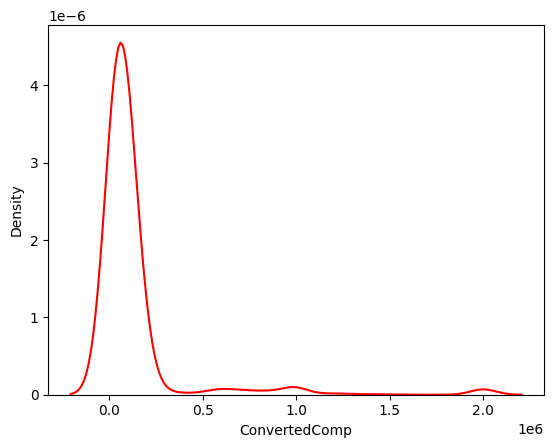

In [48]:
# your code goes here
sns.distplot(df['ConvertedComp'],hist=False,color='r',label='Annual Salary')

Plot the histogram for the column `ConvertedComp`.


Text(0, 0.5, 'Counts')

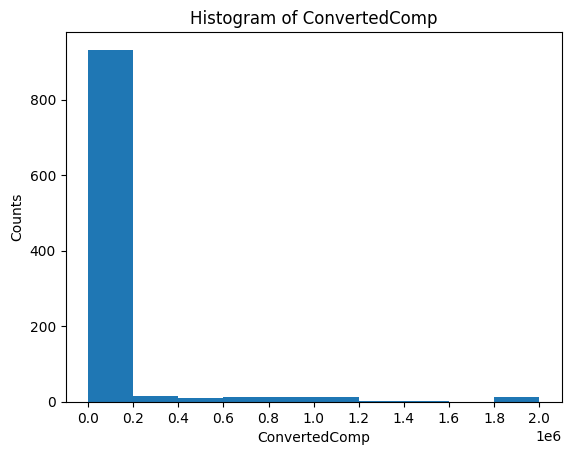

In [49]:
# your code goes here
count,bin_edges=np.histogram(df['ConvertedComp'],10)
ax=df['ConvertedComp'].plot(kind='hist',xticks=bin_edges)
ax.set_title('Histogram of ConvertedComp')
ax.set_xlabel('ConvertedComp')
ax.set_ylabel('Counts')

What is the median of the column `ConvertedComp`?


In [50]:
# your code goes here
df['ConvertedComp'].median()

65537.5

How many responders identified themselves only as a **Man**?


In [51]:
# your code goes here
len(df[df['Gender']=='Man'])


962

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [52]:
# your code goes here
df_woman=df[df['Gender']=='Woman']
df_woman['ConvertedComp'].median()

60000.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [53]:
# your code goes here
df[['Age']].describe()

,Age
count,1008.000000
mean,30.627976
std,6.640693
min,19.000000
25%,26.000000
50%,29.000000
75%,34.000000
max,63.000000


Plot a histogram of the column `Age`.


In [30]:
median_age=df['Age'].astype('float').median()
df['Age'].replace(np.nan,median_age,inplace=True)

Text(0, 0.5, 'Counts')

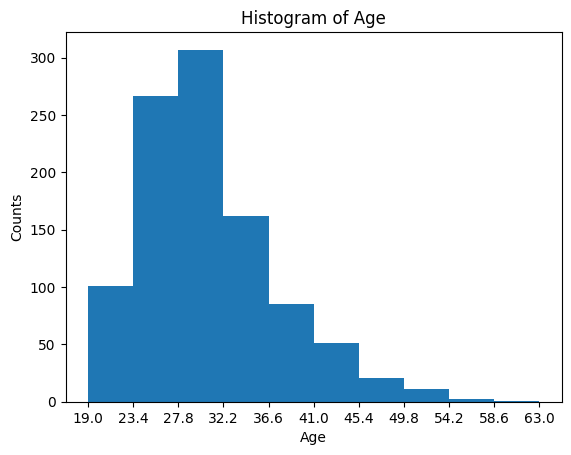

In [54]:
# your code goes here
count,bin_edges=np.histogram(df['Age'],10)
ax=df['Age'].plot(kind='hist',xticks=bin_edges)
ax.set_title('Histogram of Age')
ax.set_xlabel('Age')
ax.set_ylabel('Counts')

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


Text(0.5, 1.0, 'BoxPlot of ConvertedComp')

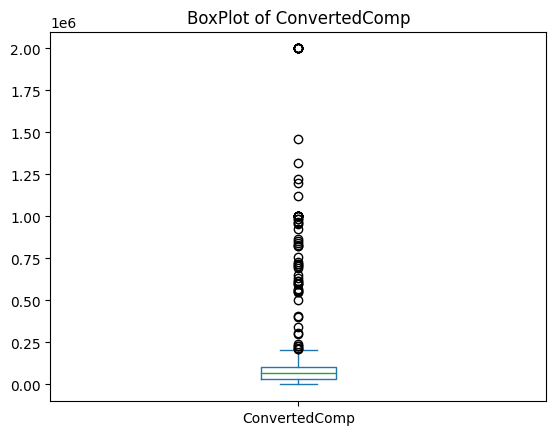

In [63]:
# your code goes here
ax=df['ConvertedComp'].plot(kind='box')
ax.set_title('BoxPlot of ConvertedComp')

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [56]:
# your code goes here
df['ConvertedComp'].describe()['25%']

34405.0

Find out the upper and lower bounds.


In [59]:
df['ConvertedComp'].describe()

count    1.008000e+03
mean     1.298559e+05
std      2.728210e+05
min      0.000000e+00
25%      3.440500e+04
50%      6.553750e+04
75%      1.052475e+05
max      2.000000e+06
Name: ConvertedComp, dtype: float64

In [64]:
# your code goes here
Q1=df['ConvertedComp'].quantile(0.25)
Q3=df['ConvertedComp'].quantile(0.75)
IQR=Q3-Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print('upper bound:',upper_bound,' lower bound:',lower_bound)

upper bound: 211511.25  lower bound: -71858.75


Identify how many outliers are there in the `ConvertedComp` column.


In [67]:
# your code goes here
outliers=df[(df['ConvertedComp']<lower_bound) | (df['ConvertedComp']>upper_bound)]['ConvertedComp']
len(outliers)

71

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [76]:
# your code goes here
new_df=df.drop(index=outliers.index)
new_df['ConvertedComp'].describe()

count       937.000000
mean      67236.009605
std       43954.435766
min           0.000000
25%       32784.000000
50%       62000.000000
75%       96000.000000
max      205000.000000
Name: ConvertedComp, dtype: float64

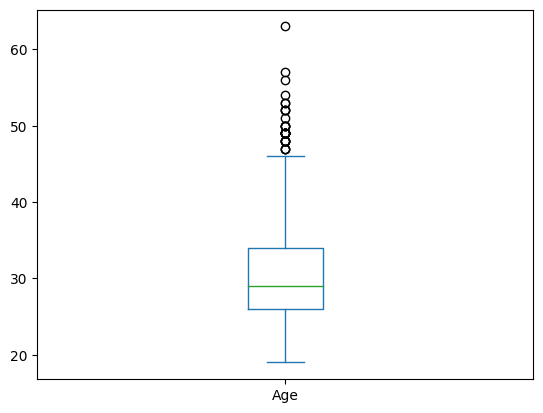

In [75]:
ax=df['Age'].plot(kind='box')

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [78]:
# your code goes here
df.corr()

C:\Users\chris\AppData\Local\Temp\ipykernel_1880\2402762529.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.057366,-0.065603,-0.060420,-0.038389,0.027928
CompTotal,-0.057366,1.000000,-0.028490,-0.006841,-0.039165,0.012503
ConvertedComp,-0.065603,-0.028490,1.000000,0.102571,-0.012538,0.109655
WorkWeekHrs,-0.060420,-0.006841,0.102571,1.000000,0.082863,0.040690
CodeRevHrs,-0.038389,-0.039165,-0.012538,0.082863,1.000000,-0.007431
Age,0.027928,0.012503,0.109655,0.040690,-0.007431,1.000000


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
